In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle
import cv2

# First create the test image and its shape index

image = cv2.imread('img/9m.jpg', 0)
r = 400.0 / image.shape[1]
dim = (400, int(image.shape[0] * r))
image = cv2.resize(image, (400, 400) ,interpolation=cv2.INTER_AREA)

s = shape_index(image)

# In this example we want to detect 'spherical caps',
# so we threshold the shape index map to
# find points which are 'spherical caps' (~1)

target = 1
delta = 0.05

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

# The shape index map relentlessly produces the shape, even that of noise.
# In order to reduce the impact of noise, we apply a Gaussian filter to it,
# and show the results once in

s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]


fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(1, 3, 1)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Input image', fontsize=18)

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)

ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharex=ax1, sharey=ax1)

x, y = np.meshgrid(
    np.arange(0, image.shape[0], 1),
    np.arange(0, image.shape[1], 1)
)

ax2.plot_surface(x, y, image, linewidth=0, alpha=0.5)

ax2.scatter(
    point_x,
    point_y,
    point_z,
    color='blue',
    label='$|s - 1|<0.05$',
    **scatter_settings
)

ax2.scatter(
    point_x_s,
    point_y_s,
    point_z_s,
    color='green',
    label='$|s\' - 1|<0.05$',
    **scatter_settings
)

ax2.legend()

ax2.axis('off')
ax2.set_title('3D visualization')

ax3 = fig.add_subplot(1, 3, 3, sharex=ax1, sharey=ax1)

ax3.imshow(s_smooth, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Shape index, $\sigma=1$', fontsize=18)

fig.tight_layout()

plt.show()

(3648, 5472)
(266, 400)


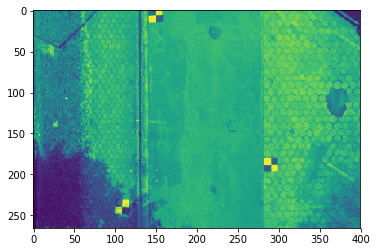

In [16]:
image = cv2.imread('img/9m.jpg', 0)
r = 400.0 / image.shape[1]
print(image.shape)
dim = (400, int(image.shape[0] * r))
image = cv2.resize(image, dim ,interpolation=cv2.INTER_AREA)
print(image.shape)
plt.imshow(image)

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import circle

image = cv2.imread('img/9m.jpg', 0)
r = 400.0 / image.shape[1]
dim = (400, int(image.shape[0] * r))
image = cv2.resize(image, (400,400) ,interpolation=cv2.INTER_AREA)
s_smooth = ndi.gaussian_filter(image, sigma=2)

s = shape_index(image)

# In this example we want to detect 'spherical caps',
# so we threshold the shape index map to
# find points which are 'spherical caps' (~1)

target = 1
delta = 0.1

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = image[point_y, point_x]

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = image[point_y_s, point_x_s]


fig = plt.figure(figsize=(24, 8))
ax1 = fig.add_subplot(1, 2, 1)

ax1.imshow(image, cmap=plt.cm.gray)

scatter_settings = dict(alpha=0.75, s=10, linewidths=0)

ax1.scatter(point_x, point_y, color='blue', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='green', **scatter_settings)

ax2 = fig.add_subplot(1, 3, 2, projection='3d', sharex=ax1, sharey=ax1)

x, y = np.meshgrid(
    np.arange(0, image.shape[0], 1),
    np.arange(0, image.shape[1], 1)
)

ax2.plot_surface(x, y, image, linewidth=0, alpha=0.5)

ax2.scatter(
    point_x,
    point_y,
    point_z,
    color='blue',
    label='$|s - 1|<0.05$',
    **scatter_settings
)

ax2.scatter(
    point_x_s,
    point_y_s,
    point_z_s,
    color='green',
    label='$|s\' - 1|<0.05$',
    **scatter_settings
)

ax2.legend()

ax2.axis('off')
ax2.set_title('3D visualization')

plt.show()
